# City of Boston 311 Data Exploration

Digging into what data is on 311, Service RequestsCity Services
https://data.cityofboston.gov/City-Services/311-Service-Requests/awu8-dc52

In [1]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline


# Load Data

https://data.cityofboston.gov/City-Services/311-Service-Requests/awu8-dc52

In [2]:
df=pd.read_csv("../../data/311__Service_Requests.csv", parse_dates=True, encoding='UTF-8', infer_datetime_format=True)

In [3]:
df.head()

,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
0,101000493034,10/16/2012 02:45:25 PM,10/18/2012 02:45:24 PM,10/17/2012 07:36:59 AM,ONTIME,Closed,Case Resolved,Sticker Request,Public Works Department,Recycling,...,1602,NaN,36 Park St,2122.0,NaN,NaN,42.3011,-71.0543,Self Service,NaN
1,101000362571,12/09/2011 04:04:25 PM,NaN,12/19/2011 11:50:23 PM,ONTIME,Closed,NaN,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,2210,NaN,89 Turner St,2135.0,NaN,NaN,42.3523,-71.1618,Self Service,NaN
2,101000301154,07/13/2011 11:40:05 AM,07/15/2011 11:40:05 AM,02/09/2012 04:16:40 PM,OVERDUE,Closed,NaN,Work w/out Permit,Inspectional Services,Building,...,1906,NaN,626 Centre St,2130.0,NaN,NaN,42.3139,-71.1138,Constituent Call,NaN
3,101000339191,10/06/2011 02:59:01 PM,10/13/2011 02:59:01 PM,10/12/2011 08:41:41 AM,ONTIME,Closed,Case Resolved,Contractor Complaints,Public Works Department,Highway Maintenance,...,2213,NaN,50-52 Burton St,2135.0,NaN,NaN,42.3550,-71.1721,Constituent Call,NaN
4,101000409680,04/18/2012 11:39:15 AM,10/15/2012 11:39:15 AM,04/19/2012 09:23:17 AM,ONTIME,Closed,Case Resolved,Upgrade Existing Lighting,Public Works Department,Street Lights,...,0303,NaN,204 Hanover St,2113.0,NaN,NaN,42.3628,-71.0557,Maximo Integration,NaN


In [4]:
df.columns

Index(['CASE_ENQUIRY_ID', 'OPEN_DT', 'TARGET_DT', 'CLOSED_DT', 'OnTime_Status',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'SUBJECT', 'REASON',
       'TYPE', 'QUEUE', 'Department', 'SubmittedPhoto', 'ClosedPhoto',
       'Location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'land_usage', 'LOCATION_STREET_NAME',
       'LOCATION_ZIPCODE', 'Property_Type', 'Property_ID', 'LATITUDE',
       'LONGITUDE', 'Source', 'Geocoded_Location'],
      dtype='object')

In [5]:
# df.describe()

In [6]:
# noisey_cols = ['LATITUDE', 'OPEN_DT', 'TARGET_DT','CLOSED_DT', 'CASE_ENQUIRY_ID', 'Location', 'LOCATION_STREET_NAME', 'Property_ID', 'LATITUDE','LONGITUDE', 'LOCATION_ZIPCODE', ]
# pdp.ProfileReport(df[df.columns.difference(noisey_cols)])
important_cols = ['OnTime_Status',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'SUBJECT', 'REASON',
       'TYPE', 'QUEUE', 'Department', 'SubmittedPhoto', 'ClosedPhoto'
       , 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'land_usage', 'Property_Type', 'Source', 'Geocoded_Location']
profile = pdp.ProfileReport(df[important_cols])

/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


In [7]:
profile.to_file(outputfile="full_profile.html")
profile

Number of variables,23
Number of observations,973993
Total Missing (%),23.3%
Total size in memory,170.9 MiB
Average record size in memory,184.0 B
Numeric,2
Categorical,17
Date,0
Text (Unique),0
Rejected,4
Distinct count,2


In [8]:
potdf = df.loc[df['TYPE'].str.contains('Pot')]
potdf.head()


,CASE_ENQUIRY_ID,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,CASE_STATUS,CLOSURE_REASON,CASE_TITLE,SUBJECT,REASON,...,precinct,land_usage,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Property_Type,Property_ID,LATITUDE,LONGITUDE,Source,Geocoded_Location
51,101001001808,01/10/2014 04:29:24 AM,NaN,01/10/2014 04:29:25 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,1404,NaN,INTERSECTION Eldon St & Washington St,NaN,NaN,NaN,42.3029,-71.0782,Employee Generated,NaN
67,101001014109,01/29/2014 08:38:15 AM,NaN,01/29/2014 08:38:15 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,0103,NaN,172-176 Sumner St,2128.0,NaN,NaN,42.3694,-71.0406,Employee Generated,NaN
89,101000316327,08/19/2011 11:36:18 AM,NaN,08/19/2011 11:36:19 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,1803,NaN,143 Colorado St,2126.0,NaN,NaN,42.2755,-71.1018,Employee Generated,NaN
92,101001007126,01/16/2014 03:17:00 PM,NaN,01/16/2014 03:17:01 PM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,0110,NaN,62A-62 Prescott St,2128.0,NaN,NaN,42.3789,-71.0295,Employee Generated,NaN
94,101000395943,03/16/2012 09:47:44 AM,NaN,03/16/2012 09:47:44 AM,ONTIME,Closed,NaN,Pothole Repair (Internal),Public Works Department,Highway Maintenance,...,0302,NaN,INTERSECTION Commercial St & Foster St,NaN,NaN,NaN,42.3677,-71.0540,Employee Generated,NaN


In [9]:
pothole_profile = pdp.ProfileReport(potdf[important_cols])

/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}
/opt/conda/lib/python3.5/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


In [10]:
pothole_profile.to_file(outputfile="pothole_profile.html")

pothole_profile


Number of variables,24
Number of observations,77677
Total Missing (%),21.7%
Total size in memory,14.2 MiB
Average record size in memory,192.0 B
Numeric,3
Categorical,17
Date,0
Text (Unique),0
Rejected,4
Distinct count,2


# Setup Data Partitions

### Citizen Reported DF

### City Worker Reported DF

In [11]:
# Citizen Reported DF

non_employee_source = ['Citizens Connect App','Constituent Call', 'Self Service', 'Twitter']
citizen_df = potdf.loc[potdf['Source'].isin(non_employee_source) ]

citizen_df.head(1)['Source']


137    Citizens Connect App
Name: Source, dtype: object

In [12]:
# City Worker Reported DF

criterion = lambda row: row['Source'] not in non_employee_source
worker_df = potdf[potdf.apply(criterion, axis=1)]

worker_df.head(1)['Source']

51    Employee Generated
Name: Source, dtype: object

# Potholes by Neigborhood

In [13]:
# helper methods
import collections

def graph_pots(dd, t=None, yl=None, xl=None):
    l = range(len(dd.keys()))
    plt.bar(l, dd.values(), align='center')
    plt.xticks(l, dd.keys(), rotation='vertical')
    plt.ylabel(yl)
    plt.xlabel(xl)
    plt.title(t)
    plt.show()
    
def graph_col(col_df, col_name):
    return graph_pots(
        collections.Counter(col_df[col_name].dropna())
        )

def potholes_by(hole_df, place, df_name):
    return graph_pots(
        collections.Counter(hole_df[place].dropna()),
        yl='Closed Potholes',
        xl='Places',
        t="Potholes by {} Reported By {}".format(place, df_name)
        )

In [14]:
df.index

RangeIndex(start=0, stop=973993, step=1)

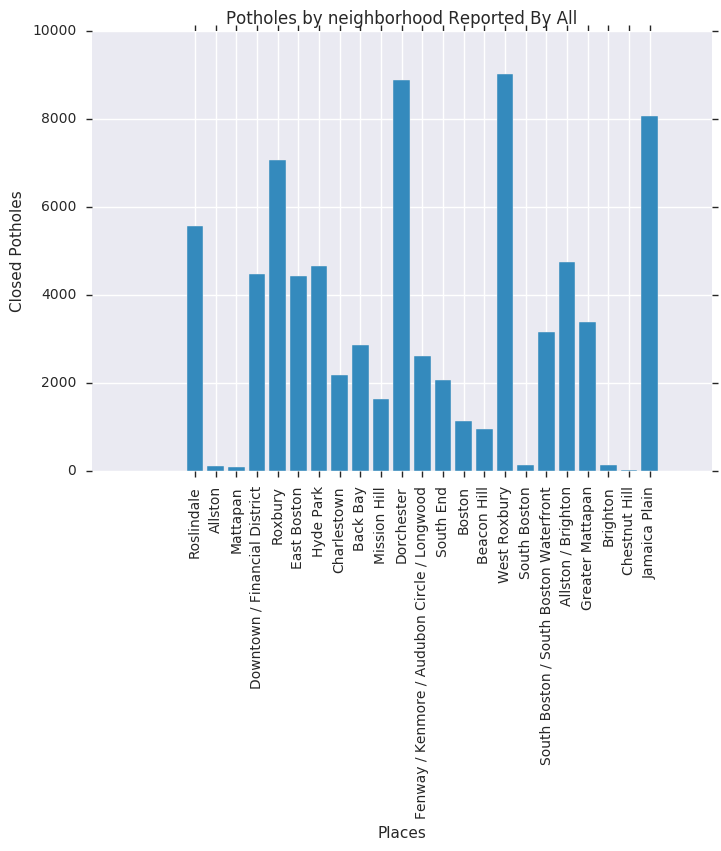

In [15]:

potholes_by(potdf, 'neighborhood', 'All')

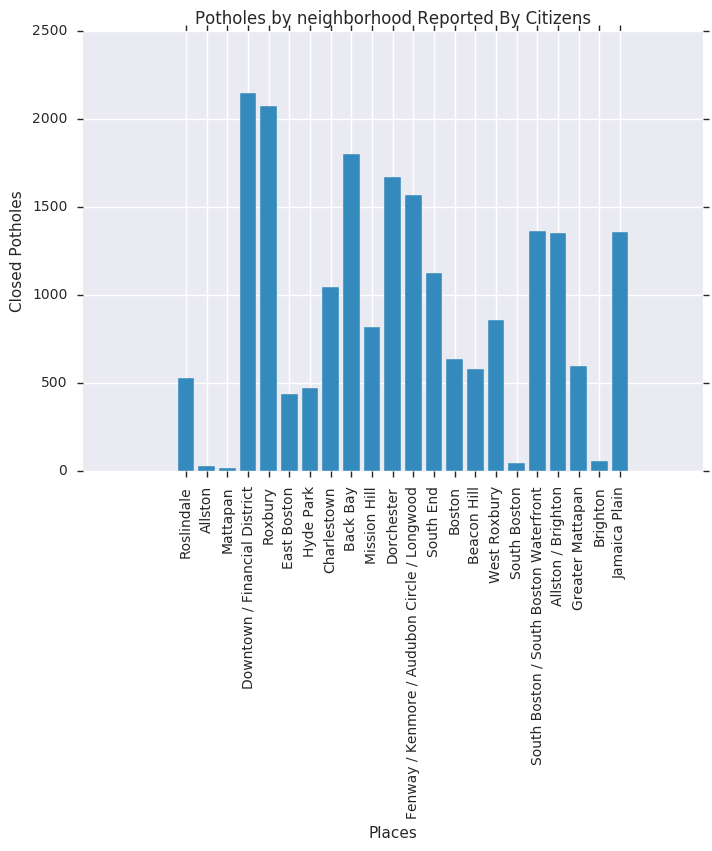

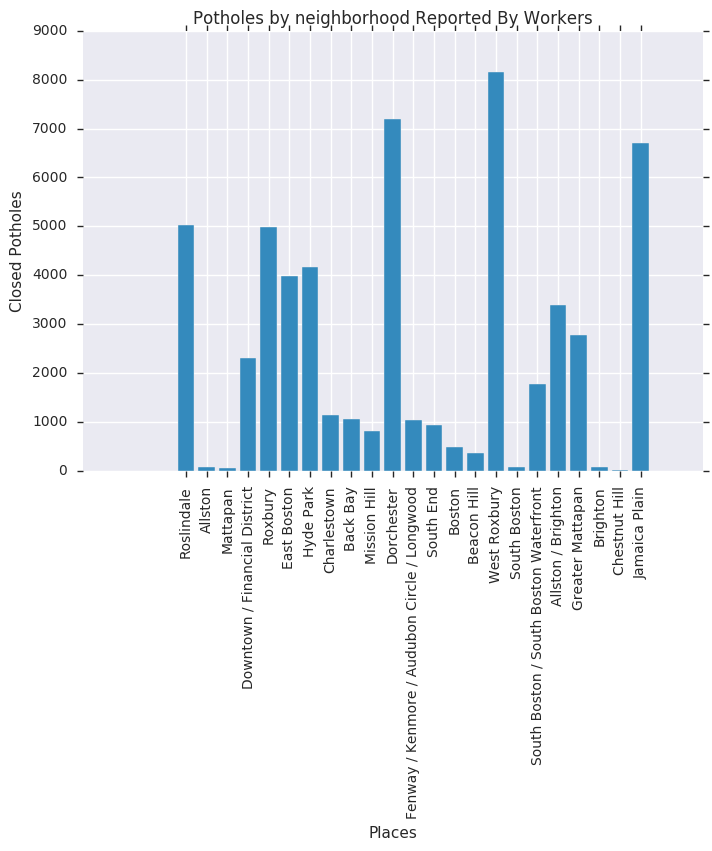

In [16]:
potholes_by(citizen_df, 'neighborhood', 'Citizens')
potholes_by(worker_df, 'neighborhood', 'Workers')

# Potholes by City Council District

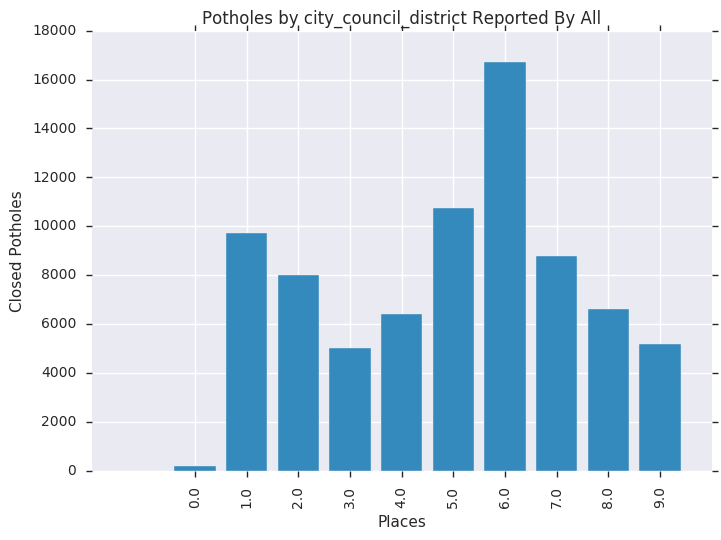

In [17]:
potholes_by(potdf, 'city_council_district', 'All')

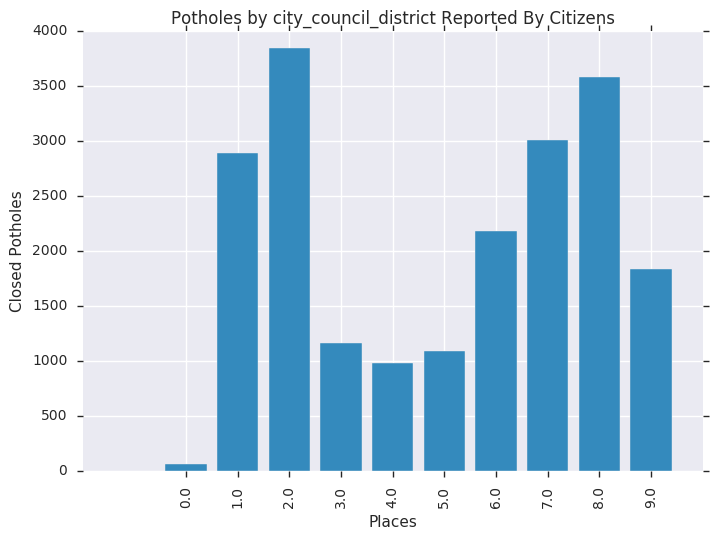

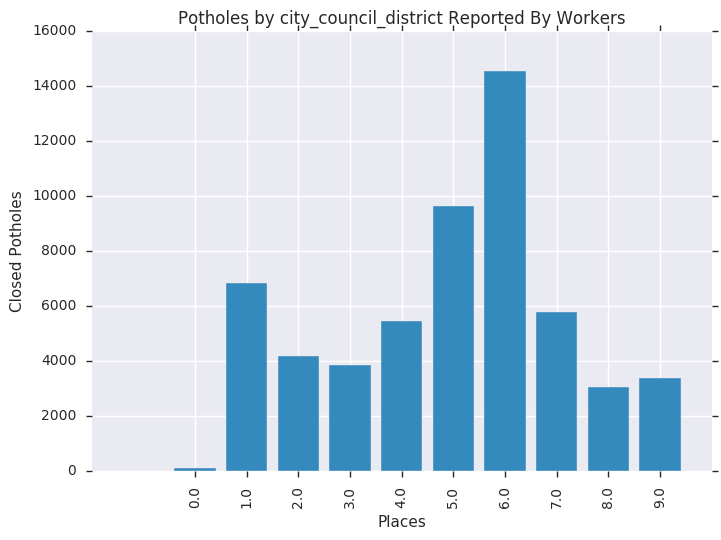

In [18]:
potholes_by(citizen_df, 'city_council_district', 'Citizens')
potholes_by(worker_df, 'city_council_district', 'Workers')

# Age of Potholes

'OPEN_DT', 'TARGET_DT', 'CLOSED_DT'

`age =  DateClosed('CLOSED_DT') - DateCreated('OPEN_DT')`

`expected_age = TargetDate('TARGET_DT') - DateCreate('OPEN_DT') `

`performance = expected_age - age`

In [19]:
potdf['age'] =  pd.to_datetime(potdf['CLOSED_DT']) - pd.to_datetime(potdf['OPEN_DT'])
potdf['expected_age'] =  pd.to_datetime(potdf['TARGET_DT']) - pd.to_datetime(potdf['OPEN_DT'])
# Datepotdf['performance'] = potdf['expected_age'] - potdf['age'] 

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
# understanding datetimes in pythons
print("Timedelta for a good date vs nan date ")

good_date = potdf.age[51]
nan_date = potdf.age[973808]

print("isinstance(good_date, pd.Timedelta): " + str(isinstance(good_date, pd.Timedelta)))
print("good.__class__ == pd.tslib.Timedelta: " + str(good_date.__class__ == pd.tslib.Timedelta))
try:
    good_date.days
    print("good_date.days")
except:
    good_date.day
    print("good_date.day")
    
print()

print("isinstance(nan_date, pd.Timedelta): " + str(isinstance(nan_date, pd.Timedelta)))
print("nan_date.__class__ == pd.tslib.Timedelta: " + str(nan_date.__class__ == pd.tslib.Timedelta))
try:
    nan_date.days
    print("nan_date.days")
except:
    nan_date.day
    print("nan_date.day")

Timedelta for a good date vs nan date 
isinstance(good_date, pd.Timedelta): True
good.__class__ == pd.tslib.Timedelta: True
good_date.days

isinstance(nan_date, pd.Timedelta): False
nan_date.__class__ == pd.tslib.Timedelta: False
nan_date.day


In [22]:
closedpotdf = potdf['age'].dropna()
potdf['age_in_days'] = closedpotdf.apply(lambda x: x.days if isinstance(x, pd.Timedelta) else 0)
# potdf['age_in_days'].dropna()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
# import collections

# # df = df[df.line_race != 0]

# dd = collections.Counter(potdf['neighborhood'].dropna())
# age_dd = collections.Counter(potdf['age_in_days'].dropna())
# age_dd
# # # plt.bar(dd.values(), dd.keys())
# # l = range(len(60)
# plt.hist(x=potdf['age_in_days'], data=potdf['neighborhood'])
# # # plt.xticks(l, age_dd.keys(), rotation='vertical')
# # plt.show()

In [24]:
potdf['age_in_days'].describe()

count    75510.000000
mean         2.138803
std         20.836784
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1378.000000
Name: age_in_days, dtype: float64

In [25]:
# p = potdf['age_in_days'].plot.hist()
# plt.show()

In [26]:
from collections import defaultdict
age_map = defaultdict(int) 

for age in potdf['age_in_days'].iteritems():
    age_map[age[1]] += 1

In [27]:
age_map

defaultdict(int,
            {0.0: 60781,
             1.0: 5726,
             2.0: 2267,
             3.0: 1461,
             4.0: 849,
             5.0: 611,
             6.0: 462,
             7.0: 279,
             8.0: 188,
             9.0: 151,
             10.0: 151,
             11.0: 135,
             12.0: 112,
             13.0: 100,
             14.0: 79,
             15.0: 70,
             16.0: 62,
             17.0: 49,
             18.0: 65,
             19.0: 49,
             20.0: 58,
             21.0: 53,
             22.0: 23,
             23.0: 25,
             24.0: 38,
             25.0: 28,
             26.0: 36,
             27.0: 34,
             28.0: 35,
             29.0: 21,
             30.0: 24,
             nan: 1,
             32.0: 20,
             33.0: 21,
             34.0: 17,
             35.0: 13,
             36.0: 13,
             37.0: 11,
             38.0: 8,
             39.0: 18,
             40.0: 25,
             41.0: 15,
           

In [72]:
# non_employee_source = ['Citizens Connect App','Constituent Call', 'Self Service', 'Twitter']
# citizens_df = potdf.loc[(potdf['CASE_STATUS'] == 'Closed' ) &(potdf['Source'].isin(non_employee_source)) ]
# citizens_df.head()

In [78]:

citizens_age = defaultdict(int) 

for age in citizens_df['age_in_days'].iteritems():
    citizens_age[age[1]] += 1
    
citizens_age

top_n = 40
age_keys = sorted(citizens_age.keys())

print("first {} days:\n".format(top_n))
for i in age_keys[:top_n]:
    print(i, citizens_age[i])
    
print()

bottom_n = 5
print("last {} days:\n".format(bottom_n))
for i in age_keys[len(keys) - bottom_n:]:
    print(i, citizens_age[i])
    

first 40 days:

0.0 8874
1.0 3333
2.0 1795
3.0 1113
4.0 652
5.0 438
6.0 359
7.0 204
8.0 144
9.0 109
10.0 117
11.0 112
12.0 94
13.0 83
14.0 61
15.0 60
16.0 47
17.0 38
18.0 47
19.0 42
20.0 51
21.0 35
22.0 22
23.0 23
24.0 21
25.0 22
26.0 31
27.0 33
28.0 30
29.0 18
30.0 22
31.0 24
32.0 16
33.0 17
34.0 13
35.0 10
36.0 13
37.0 9
38.0 8
39.0 18

last 5 days:

961.0 1
991.0 1
1112.0 1
1294.0 1
1378.0 1


# Picking arbitray cut off

Essentially, we have a long tail. We should try different cut offs. But figure out what those % are.}

## cumulative_days

In [81]:
cumulative_days =  defaultdict(int) 
seen = []
for k in age_keys:
    seen.append(k)
    for older in seen:
        cumulative_days[k] += citizens_age[older]

for i in range(45):
    print(i, cumulative_days[i])

0 8874
1 12207
2 14002
3 15115
4 15767
5 16205
6 16564
7 16768
8 16912
9 17021
10 17138
11 17250
12 17344
13 17427
14 17488
15 17548
16 17595
17 17633
18 17680
19 17722
20 17773
21 17808
22 17830
23 17853
24 17874
25 17896
26 17927
27 17960
28 17990
29 18008
30 18030
31 18054
32 18070
33 18087
34 18100
35 18110
36 18123
37 18132
38 18140
39 18158
40 18182
41 18197
42 18210
43 18218
44 18223


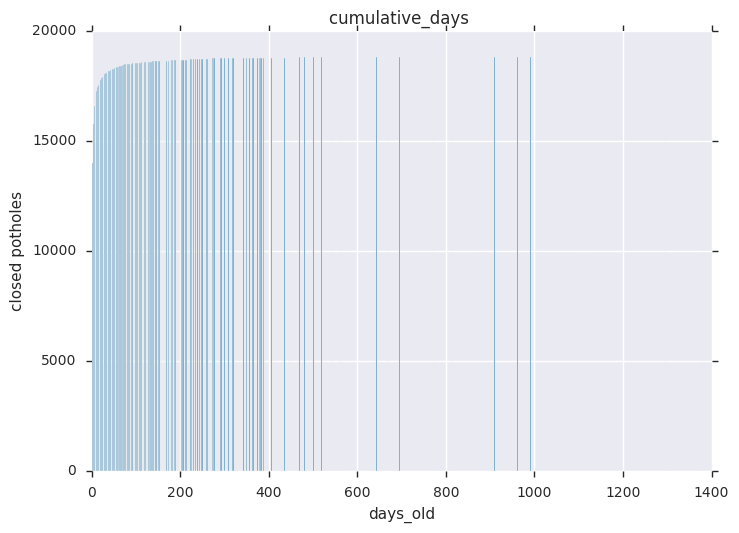

In [82]:
x1 = []
y1 = []
for date in cumulative_days:
    x1.append(date)
    y1.append(cumulative_days[date])
plt.ylabel('closed potholes')
plt.xlabel('days_old')
plt.title('cumulative_days ')
plt.bar(x1,  y1)
plt.show()



In [83]:
n = citizens_df.shape[0]
print("N examples: "+str(n))

N examples: 18804


In [84]:
percent_by_day =  defaultdict(int) 
seen = []
for k in cumulative_days:
    percent_by_day[k] = cumulative_days[k]/n

percent_by_day  

for i in range(205): # 95% percentile
    print(i, percent_by_day[i])

0 0.47192086790044674
1 0.6491703892788768
2 0.7446288023824719
3 0.8038183365241438
4 0.8384918102531377
5 0.8617847266539034
6 0.8808764092746224
7 0.8917251648585407
8 0.8993831099766008
9 0.9051797489895766
10 0.9114018293980004
11 0.9173580089342693
12 0.9223569453307807
13 0.9267708998085513
14 0.9300148904488407
15 0.933205700914699
16 0.9357051691129546
17 0.9377260157413316
18 0.9402254839395873
19 0.9424590512656882
20 0.9451712401616678
21 0.9470325462667517
22 0.9482025101042332
23 0.9494256541161455
24 0.9505424377791959
25 0.9517124016166773
26 0.9533609870240375
27 0.9551159327802595
28 0.9567113380131886
29 0.9576685811529462
30 0.9588385449904275
31 0.9601148691767709
32 0.9609657519676664
33 0.961869814932993
34 0.9625611572005957
35 0.9630929589449053
36 0.963784301212508
37 0.9642629227823867
38 0.9646883641778345
39 0.965645607317592
40 0.9669219315039354
41 0.9677196341204
42 0.9684109763880026
43 0.9688364177834503
44 0.9691023186556051
45 0.9695809402254839
46 0

In [88]:
# compute_percent_changes_points
prev = 0.0

change_chart = {}
for indx in percent_by_day:
    current = (percent_by_day[indx] * 100)
    if (current - prev >= 1) and (current != 0):
        print("CHANGE @ {} current:{} prev:{}".format(indx,current, prev))
        prev = current
        
        
percent_by_day[31]    

CHANGE @ 0.0 current:47.19208679004468 prev:0.0
CHANGE @ 1.0 current:64.91703892788769 prev:47.19208679004468
CHANGE @ 2.0 current:74.46288023824718 prev:64.91703892788769
CHANGE @ 3.0 current:80.38183365241439 prev:74.46288023824718
CHANGE @ 4.0 current:83.84918102531377 prev:80.38183365241439
CHANGE @ 5.0 current:86.17847266539033 prev:83.84918102531377
CHANGE @ 6.0 current:88.08764092746225 prev:86.17847266539033
CHANGE @ 7.0 current:89.17251648585408 prev:88.08764092746225
CHANGE @ 9.0 current:90.51797489895766 prev:89.17251648585408
CHANGE @ 11.0 current:91.73580089342693 prev:90.51797489895766
CHANGE @ 14.0 current:93.00148904488407 prev:91.73580089342693
CHANGE @ 18.0 current:94.02254839395873 prev:93.00148904488407
CHANGE @ 24.0 current:95.0542437779196 prev:94.02254839395873
CHANGE @ 32.0 current:96.09657519676664 prev:95.0542437779196
CHANGE @ 48.0 current:97.11763454584131 prev:96.09657519676664
CHANGE @ 73.0 current:98.13337587747287 prev:97.11763454584131
CHANGE @ 637.0 cu

0.9601148691767709

In [89]:
cut_off = 24 # 99

for i in range(170, 175): # 95% percentile
    print(i, percent_by_day[i])

170 0.9910125505211657
171 0
172 0.9911189108700277
173 0.9911720910444586
174 0.9912252712188896


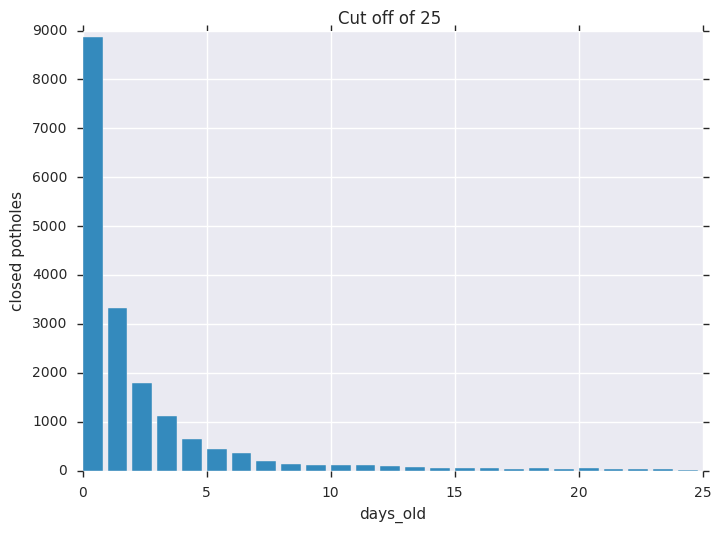

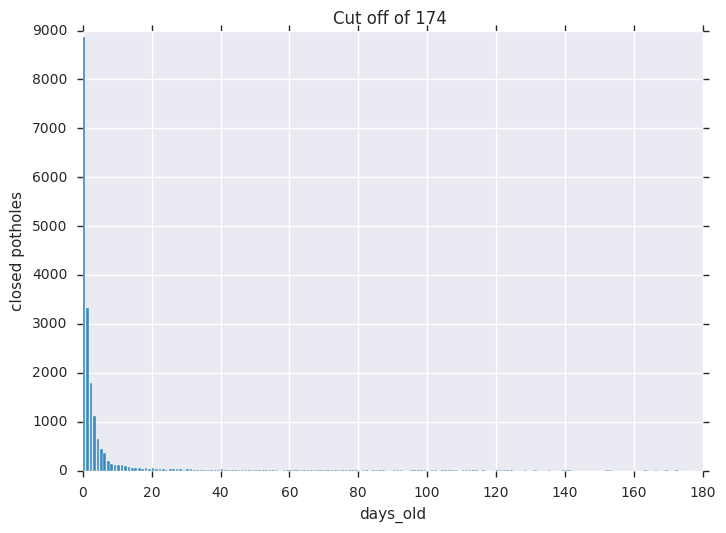

In [90]:
cut_off_dates = [25, 174]
for cut_off in cut_off_dates:
    x = []
    y = []
    for date in range(cut_off):
        x.append(citizens_age[date])
        y.append(date)
    plt.bar( y, x, log=False)
    plt.ylabel('closed potholes')
    plt.xlabel('days_old')
    plt.title('Cut off of {} '.format(cut_off))
    plt.show()
